498.38029825480476


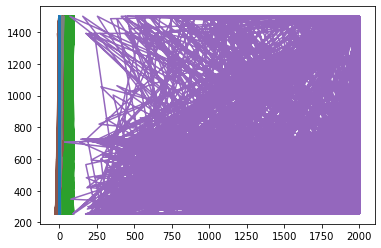

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# No need to fill NA. No data missing. 

data = pd.read_csv('SeoulBikeData.csv', header=0, usecols=(1,2,3,4,5,6,7,8,9,10,11,12))
# Convert strings to discrete values
le = LabelEncoder()
le.fit(data['Seasons'])
data['Seasons'] = le.transform(data['Seasons'])
le.fit(data['Holiday'])
data['Holiday'] = le.transform(data['Holiday'])
y = data['Rented Bike Count']
data = data.drop(['Rented Bike Count'], axis=1)
x_train, x_test, y_train, y_test=train_test_split(data, y, test_size=0.2, random_state=42)
# plt.plot(data['Hour'], y)

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_train,y_train)
y_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
# cross_val_score(tree_reg, x_test, y_test, cv=10)

forest_reg = RandomForestRegressor(max_depth=2)
forest_reg.fit(x_train, y_train)
y_forest_pred = forest_reg.predict(x_test)
#plt.plot(x_test, y_test)
plt.plot(x_test, y_forest_pred)